# 2. TensorFlow Sample

In [1]:
# TensorFlow version
import tensorflow as tf

print(tf.__version__)

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.5.0


## 2.1 Linear Regression

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Epoch 0050 cost= 0.079158947 W= 0.2758312 b= 0.61271507
Epoch 0100 cost= 0.078906551 W= 0.27427086 b= 0.62393945
Epoch 0150 cost= 0.078683414 W= 0.2728033 b= 0.63449746
Epoch 0200 cost= 0.078486152 W= 0.27142307 b= 0.64442664
Epoch 0250 cost= 0.078311726 W= 0.27012476 b= 0.65376633
Epoch 0300 cost= 0.078157574 W= 0.2689039 b= 0.6625501
Epoch 0350 cost= 0.078021318 W= 0.26775545 b= 0.67081124
Epoch 0400 cost= 0.077900864 W= 0.26667544 b= 0.6785813
Epoch 0450 cost= 0.077794395 W= 0.2656595 b= 0.6858896
Epoch 0500 cost= 0.077700295 W= 0.26470408 b= 0.6927634
Epoch 0550 cost= 0.077617168 W= 0.26380515 b= 0.69922936
Epoch 0600 cost= 0.077543691 W= 0.26295996 b= 0.70530975
Epoch 0650 cost= 0.077478737 W= 0.262165 b= 0.7110288
Epoch 0700 cost= 0.077421375 W= 0.26141727 b= 0.7164078
Epoch 0750 cost= 0.077370703 W= 0.260714 b= 0.7214668
Epoch 0800 cost= 0.077325910 W= 0.2600525 b= 0.7262255
Epoch 0850 cost= 0.077286348 W= 0.2594305 b= 0.7307004
Epoch 0900 cost= 0.077251419 W= 0.25884524 b= 0.73

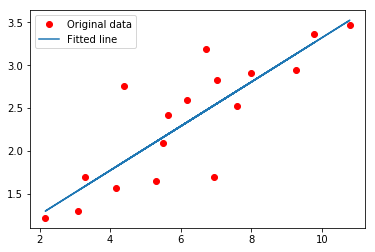

In [7]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## 2.1 MNIST For ML Beginners

https://www.tensorflow.org/get_started/mnist/beginners#mnist-for-ml-beginners

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [10]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [11]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9011
